## Analysis Page

### Initial Imports

In [1]:


# Data Analysis of Initial Scrape


# Imports:

import requests
import pandas as pd
import numpy as np
import re
import csv
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import urllib.request
import nltk
import nltk.corpus  
from nltk.text import Text
import sys

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
# import usaddress


# Get file.

data_file = 'app/static/data/reviews.csv'

def read_csv(filename):
    with open(filename, 'r') as f:
        data = list(csv.reader(f))
    return data


df = pd.read_csv(data_file)

# Drop extra column. 
df = df.drop(columns='Unnamed: 0')







# Clean and Lemmatize words for use.





    



### Text Lemmatizer

In [2]:

# Clean and Lemmatize words for use.

def textLemmatizer(my_text):

    raw_words = nltk.word_tokenize(my_text)
    # Clean words
    words = [word for word in raw_words if len(word) > 1]
    words = [word for word in words if word.isalpha()]
    words = [w.lower() for w in words if w.isalnum()]
    # Stop words
    stopwords = set(nltk.corpus.stopwords.words('english'))
    # There are plenty of functions that allow us to modify the stopwords.
    words = [word for word in words if word not in stopwords]
    # Lemma or Stem; use Lemmatizer for better results
    wnl = nltk.WordNetLemmatizer()
    cleaned_words = [wnl.lemmatize(t) for t in words]
#     print(cleaned_words)
    return cleaned_words


df['cleaned words list'] = df['review'].apply(textLemmatizer)
df


,rating,review,name,address,cleaned words list
0,5,Had a great time at Sassafras last night!! I h...,Sassafras,"688 Broadway Somerville, MA 02144","[great, time, sassafras, last, night, made, re..."
1,5,"Internet eaters, it is fair to say that this p...",Sassafras,"688 Broadway Somerville, MA 02144","[internet, eater, fair, say, place, blew, mind..."
2,1,Hello! So first off I am not one to write revi...,Sassafras,"688 Broadway Somerville, MA 02144","[hello, first, one, write, review, comment, se..."
3,5,Sassafras is a one of a kind restaurant. I sto...,Sassafras,"688 Broadway Somerville, MA 02144","[sassafras, one, kind, restaurant, stopped, re..."
4,3,Excited by a new vegetarian/vegan restaurant a...,Sassafras,"688 Broadway Somerville, MA 02144","[excited, new, restaurant, quickly, stopped, e..."
5,2,"Good concept, poor execution. Famous seitan ri...",Sassafras,"688 Broadway Somerville, MA 02144","[good, concept, poor, execution, famous, seita..."
6,4,Third time's the charm. I had the Big Mac and...,Sassafras,"688 Broadway Somerville, MA 02144","[third, time, charm, big, mac, boyfriend, supr..."
7,5,One of the best things about Eat At Jumbo's an...,Sassafras,"688 Broadway Somerville, MA 02144","[one, best, thing, eat, jumbo, sassafras, meat..."
8,5,"First of all, super awesome menu. Hard to find...",Sassafras,"688 Broadway Somerville, MA 02144","[first, super, awesome, menu, hard, find, exte..."
9,5,Today was my first time here and this place ha...,Sassafras,"688 Broadway Somerville, MA 02144","[today, first, time, place, lost, word, food, ..."


### Convert String to List

In [3]:
# Write a function to turn a string to a list.

def stringFromList(my_list):
    new_string = ' '.join(my_list)
    return new_string

# Turn Cleaned Words into a string.

df['cleaned words'] = df['cleaned words list'].apply(stringFromList)
df['reviewblob'] = df['cleaned words'].apply(TextBlob)



### Sentiment Analysis

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fca1780>
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b1fc4e0>
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b376550>
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b387c88>
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b44fc50>
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b5c9128>


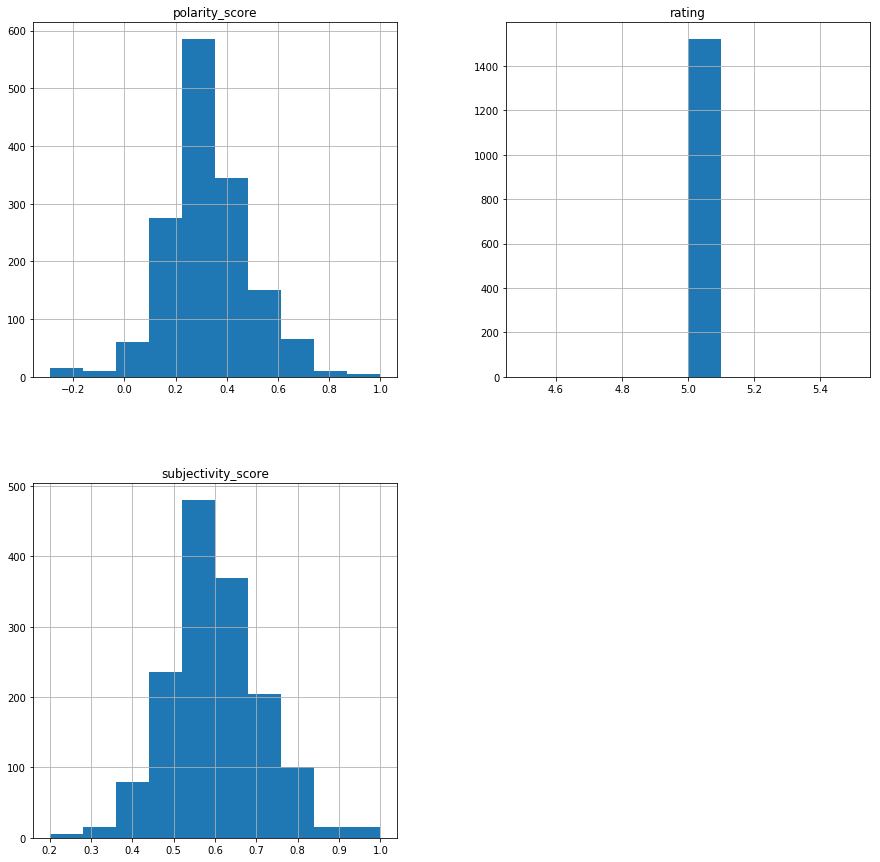

In [4]:
# Sentiment

# blob = document1


sentences = []
sentiment_df = pd.DataFrame(columns=['sentence', 'polarity', 'subjectivity'])

# Records the sentiments of an individual review.
def reviewPolarity(rev_blob):
    polarity = []
    for sentence in rev_blob.sentences:
        polarity.append(sentence.sentiment.polarity)
    polarity_array = np.array(polarity)
    mean = np.mean(polarity_array)
#     print(mean)
    return mean

    
def reviewSubjectivity(rev_blob):
    subjectivity = []
    for sentence in rev_blob.sentences:
        subjectivity.append(sentence.sentiment.subjectivity)
    subjectivity_array = np.array(subjectivity)
    mean = np.mean(subjectivity_array)
#     print(mean)
    return mean



df['reviewblob'] = df['cleaned words'].apply(TextBlob)
df['subjectivity_score'] = df['reviewblob'].apply(reviewSubjectivity)
df['polarity_score'] = df['reviewblob'].apply(reviewPolarity)

# df = df.drop(columns='reviewblob')

# print(df.corr())

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
for i in range(6):
    print(df[df['rating'] == i].hist(ax=ax))

In [5]:
# Distribution Analysis by Rating:

# fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(111)
# for i in range(6):
#     df[df['rating'] == i]['polarity_score'].hist(ax=ax, label='Stars:  {}'.format(i),alpha=0.6)
# plt.title('Sentiment Polarity Distribution by Rating')
# plt.xlabel('Polarity')
# plt.ylabel('Frequency')
# plt.legend()

# # plt.savefig('app/static/graph_images/polar_dist.png')

# fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(111)
# for i in range(6):
#     df[df['rating'] == i]['subjectivity_score'].hist(ax=ax, label='Stars:  {}'.format(i),alpha=0.6)
# plt.title('Sentiment Subjectivity Distribution by Rating')
# plt.xlabel('Subjectivity')
# plt.ylabel('Frequency')
# plt.legend()

# # plt.savefig('app/static/graph_images/polar_dist.png')



### Frequency Distribution Plots

In [6]:
df['noun_phrases'] = df['reviewblob'].apply(lambda blob: blob.noun_phrases[:10])
df['top words'] = df['cleaned words list'].apply(lambda words: nltk.FreqDist(words).most_common(10))



### Style

In [7]:
## Define Styles:

def color_map(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if val < -0.5:
        color = 'red'
    elif val > 0.5 and val != 1:
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color

def strong_color_green(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'green' if val > 0.5 and val !=1 else 'black'
    return 'color: %s' % color

# def highlight_max(data, color='green'):
#     '''
#     highlight the maximum in a Series or DataFrame
#     '''
#     attr = 'background-color: {}'.format(color)
#     if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
#         is_max = data == data.max()
#         return [attr if v else '' for v in is_max]
#     else:  # from .apply(axis=None)
#         is_max = data == data.max().max()
#         return pd.DataFrame(np.where(is_max, attr, ''),
#                             index=data.index, columns=data.columns)




In [8]:
quant_df = df.groupby(['name']).corr()


quant_df.style.\
    applymap(color_map)

In [9]:
df

,rating,review,name,address,cleaned words list,cleaned words,reviewblob,subjectivity_score,polarity_score,noun_phrases,top words
0,5,Had a great time at Sassafras last night!! I h...,Sassafras,"688 Broadway Somerville, MA 02144","[great, time, sassafras, last, night, made, re...",great time sassafras last night made reservati...,"(g, r, e, a, t, , t, i, m, e, , s, a, s, s, ...",0.556349,0.271825,"[great time sassafras, reservation father law ...","[(cheese, 5), (star, 5), (mac, 4), (chocolate,..."
1,5,"Internet eaters, it is fair to say that this p...",Sassafras,"688 Broadway Somerville, MA 02144","[internet, eater, fair, say, place, blew, mind...",internet eater fair say place blew mind huge f...,"(i, n, t, e, r, n, e, t, , e, a, t, e, r, , ...",0.637721,0.371179,"[internet eater fair, place blew mind, huge fa...","[(say, 2), (place, 2), (option, 2), (would, 2)..."
2,1,Hello! So first off I am not one to write revi...,Sassafras,"688 Broadway Somerville, MA 02144","[hello, first, one, write, review, comment, se...",hello first one write review comment service b...,"(h, e, l, l, o, , f, i, r, s, t, , o, n, e, ...",0.534700,0.085883,"[review comment service, experience sassafras,...","[(grover, 8), (christopher, 6), (would, 5), (p..."
3,5,Sassafras is a one of a kind restaurant. I sto...,Sassafras,"688 Broadway Somerville, MA 02144","[sassafras, one, kind, restaurant, stopped, re...",sassafras one kind restaurant stopped renovati...,"(s, a, s, s, a, f, r, a, s, , o, n, e, , k, ...",0.690000,0.467500,"[kind restaurant, vegan restaurant ca, restaur...","[(vegan, 6), (restaurant, 3), (sassafras, 2), ..."
4,3,Excited by a new vegetarian/vegan restaurant a...,Sassafras,"688 Broadway Somerville, MA 02144","[excited, new, restaurant, quickly, stopped, e...",excited new restaurant quickly stopped entered...,"(e, x, c, i, t, e, d, , n, e, w, , r, e, s, ...",0.557576,0.378939,"[new restaurant, knock barn door, aback price,...","[(menu, 2), (excited, 1), (new, 1), (restauran..."
5,2,"Good concept, poor execution. Famous seitan ri...",Sassafras,"688 Broadway Somerville, MA 02144","[good, concept, poor, execution, famous, seita...",good concept poor execution famous seitan rib ...,"(g, o, o, d, , c, o, n, c, e, p, t, , p, o, ...",0.500000,0.234848,"[good concept, poor execution, famous seitan r...","[(tofu, 2), (customer, 2), (service, 2), (tabl..."
6,4,Third time's the charm. I had the Big Mac and...,Sassafras,"688 Broadway Somerville, MA 02144","[third, time, charm, big, mac, boyfriend, supr...",third time charm big mac boyfriend supreme piz...,"(t, h, i, r, d, , t, i, m, e, , c, h, a, r, ...",0.414286,0.385714,"[time charm, big mac boyfriend, supreme pizza ...","[(big, 3), (mac, 3), (time, 2), (pizza, 2), (d..."
7,5,One of the best things about Eat At Jumbo's an...,Sassafras,"688 Broadway Somerville, MA 02144","[one, best, thing, eat, jumbo, sassafras, meat...",one best thing eat jumbo sassafras meat option...,"(o, n, e, , b, e, s, t, , t, h, i, n, g, , ...",0.617424,0.089394,"[jumbo sassafras meat option, eggplant parmesa...","[(meat, 2), (looking, 2), (get, 2), (one, 1), ..."
8,5,"First of all, super awesome menu. Hard to find...",Sassafras,"688 Broadway Somerville, MA 02144","[first, super, awesome, menu, hard, find, exte...",first super awesome menu hard find extensive c...,"(f, i, r, s, t, , s, u, p, e, r, , a, w, e, ...",0.555357,0.135119,"[super awesome menu, extensive choice taste go...","[(awesome, 2), (chicken, 2), (first, 1), (supe..."
9,5,Today was my first time here and this place ha...,Sassafras,"688 Broadway Somerville, MA 02144","[today, first, time, place, lost, word, food, ...",today first time place lost word food world am...,"(t, o, d, a, y, , f, i, r, s, t, , t, i, m, ...",0.776667,0.215000,"[time place, word food world, amazing unique d...","[(food, 2), (amazing, 2), (ever, 2), (today, 1..."


In [21]:
df['cleaned words'] = df['cleaned words list'].apply(stringFromList)
df['reviewblob'] = df['cleaned words'].apply(TextBlob)
df['noun_phrases'] = df['reviewblob'].apply(lambda blob: blob.noun_phrases[:10])
df['top bigrams'] = df['cleaned words list'].apply(lambda words: nltk.FreqDist(words).most_common(10))

In [20]:
full_word_list = df['cleaned words'].str.cat(sep = ' ')
